# DataFrame plot

In [1]:
import pandas as pd
import matplotlib as mpl

mpl.matplotlib_fname()

# 한글 깨짐 현상: https://hyemin-kim.github.io/2020/06/25/S-Python-Pandas-visual/

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


'c:\\Users\\gik_k\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [5]:
df_pop = pd.read_csv('./data/202410_202410_연령별인구현황_월간.csv', encoding='UTF-8', thousands=',')
new_index = df_pop.행정구역.str.split('(', expand=True)[0].str.strip()
df_pop.drop('행정구역', axis=1, inplace=True)
df_pop.index = new_index
df = df_pop[['2024년10월_계_총인구수', '2024년10월_계_연령구간인구수', '2024년10월_계_0~9세',
       '2024년10월_계_10~19세', '2024년10월_계_20~29세', '2024년10월_계_30~39세',
       '2024년10월_계_40~49세', '2024년10월_계_50~59세', '2024년10월_계_60~69세',
       '2024년10월_계_70~79세', '2024년10월_계_80~89세', '2024년10월_계_90~99세',
       '2024년10월_계_100세 이상']]
df.drop('2024년10월_계_연령구간인구수', axis=1, inplace=True)
current_cols = [x.split('_')[2] for x in list(df.columns)]
df.columns = current_cols
df.index.name = '자치단체명'
df_pop = df.drop('전국', axis=0)
df_pop

C:\Users\gik_k\AppData\Local\Temp\ipykernel_22572\2870941088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('2024년10월_계_연령구간인구수', axis=1, inplace=True)


,총인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
자치단체명,,,,,,,,,,,,
서울특별시,9343304,487458,723446,1318398,1439369,1389768,1489846,1324308,766703,353817,48679,1512
부산광역시,3271062,183384,262936,361691,389456,473403,538648,561037,333473,147973,18623,438
대구광역시,2364892,143252,212540,270301,282272,346404,419133,373733,203104,100288,13603,262
인천광역시,3017928,196120,272380,353794,420642,476741,517290,456691,209690,98125,15958,497
광주광역시,1410548,93779,145773,183555,173765,221038,243183,189695,102420,49671,7483,186
대전광역시,1440094,92255,135890,194905,190213,214434,244136,205497,104573,50294,7682,215
울산광역시,1098540,73933,109213,117870,136434,174044,203429,174191,76256,29117,3969,84
세종특별자치시,389978,41643,52212,37131,58906,77263,56733,38472,17513,8434,1630,41
경기도,13686731,946337,1320679,1637135,1900885,2222316,2358181,1896883,894514,439153,68687,1961


<Axes: xlabel='자치단체명'>

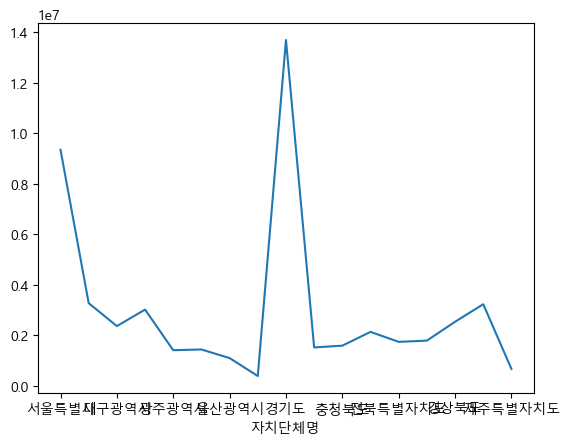

In [ ]:
# 선 그래프
df_pop['총인구수'].plot()

<Axes: title={'center': '20대, 40대 인구'}, xlabel='자치단체명'>

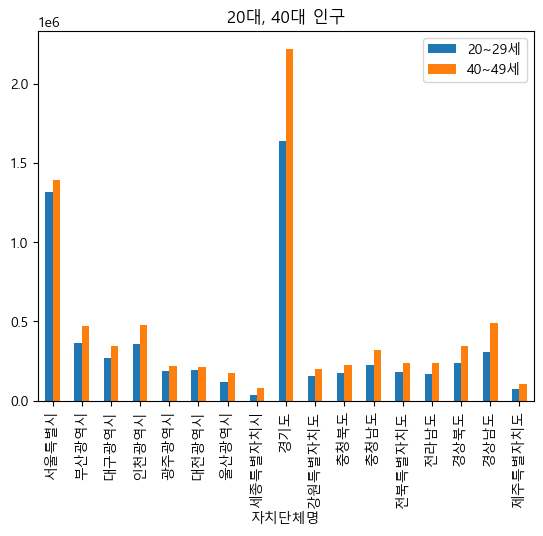

In [27]:
# 수직 막대 그래프
df_pop[['20~29세','40~49세']].plot(kind='bar',title='20대, 40대 인구')

<Axes: ylabel='자치단체명'>

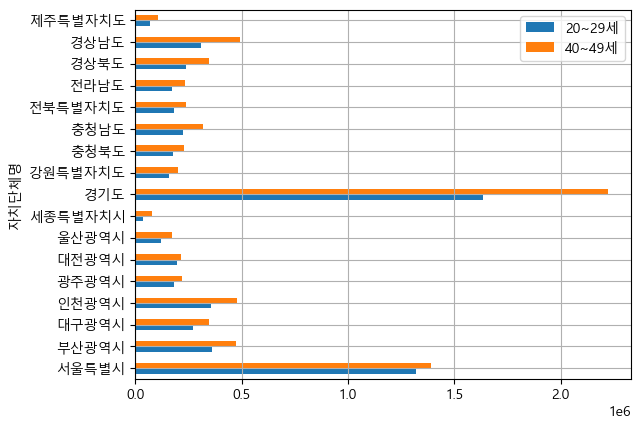

In [26]:
# 수평 막대 그래프
df_pop[['20~29세','40~49세']].plot(kind='barh', grid='True')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

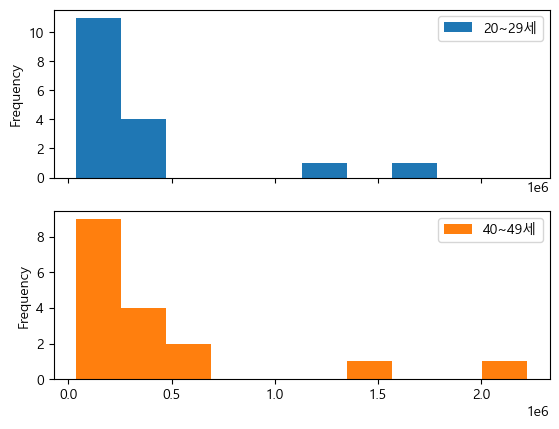

In [28]:
# 히스토그램
df_pop[['20~29세','40~49세']].plot(kind='hist',subplots=True)

<Axes: ylabel='Density'>

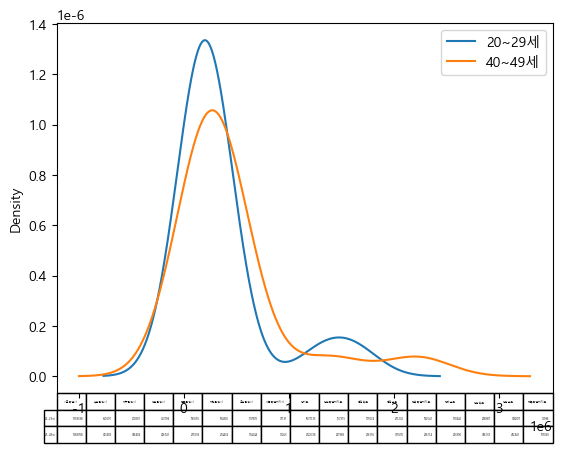

In [29]:
# 커널 밀도 그래프
df_pop[['20~29세','40~49세']].plot(kind='kde',table=True)

<Axes: xlabel='자치단체명'>

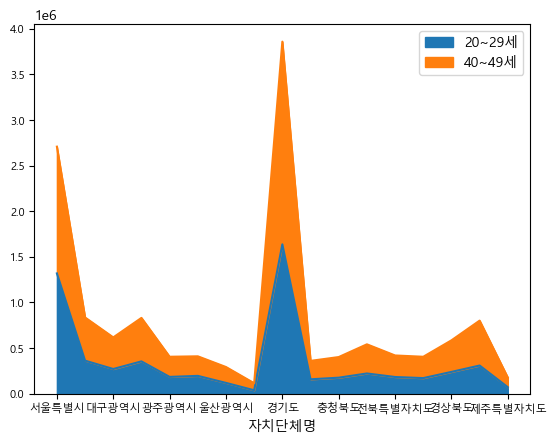

In [31]:
# 면적 그래프
df_pop[['20~29세','40~49세']].plot(kind='area', fontsize=8)

<Axes: ylabel='총인구수'>

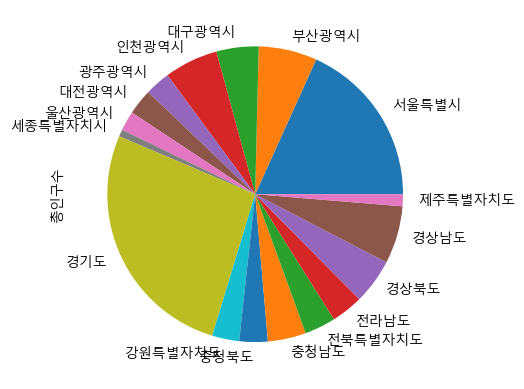

In [34]:
# 파이 그래프
df_pop['총인구수'].plot(kind='pie')

<Axes: xlabel='총인구수', ylabel='40~49세'>

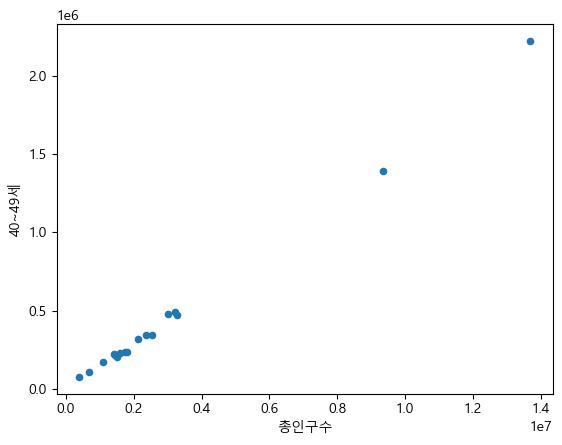

In [44]:
# 산점도 그래프
df_pop.plot(kind='scatter',x='총인구수',y='40~49세')